# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! 

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display, Markdown # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [3, 27, 175]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  13265  1196     4221    6404               507          1788
1  14276   803     3045     485               100           518
2   2343  7845    11874      52              4196          1697

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

In [4]:
# import plotting packages
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# convert the data to long format for easier plotting
data_long = data.melt(value_vars=data.columns, var_name='Category', value_name='Purchase Cost')

In [6]:
def plot_sample(df, sample, title, ax):
    '''Plots the values of an individual sample as compared to the overall data distributions by feature.'''
    
    sns.boxplot(x='Category', y='Purchase Cost', data=df, ax=ax)
    ax.set_ylim(0, 20000)
    for i, cost in enumerate(sample):
        xmin = i / 6
        ax.axhline(cost, xmin=xmin, xmax=xmin+1/6, color='r', linestyle='--')
    ax.set_title(title, fontweight='bold', fontsize=16)
    labels = [item.get_text() for item in ax.get_xticklabels()]
    labels[4] = 'Detergents\npaper'
    ax.set_xticklabels(labels)

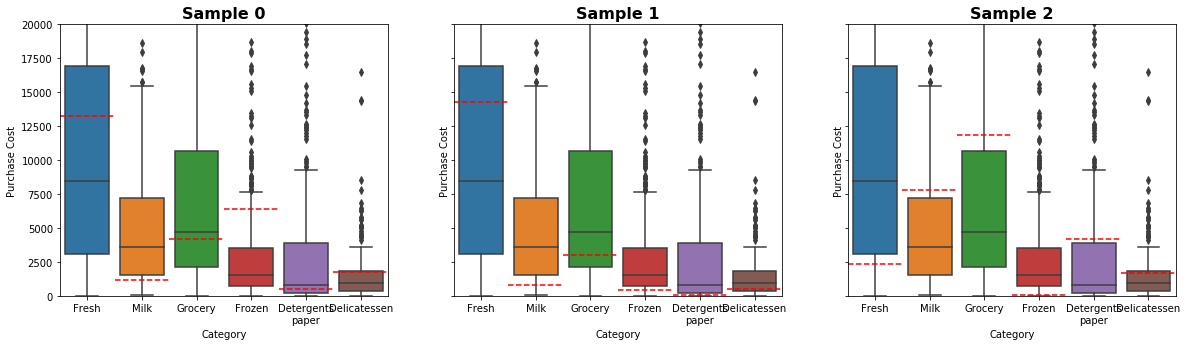

In [7]:
# plot the data distributions and the samples
fig, ax = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
for i in range(3):
    plot_sample(data_long, samples.loc[i], 'Sample {}'.format(i), ax[i])

To simplify answering this question, I plotted each sample's purchase cost by category as red dashed lines in the boxplot chart above. Based on what we see in the chart:

* **Sample 0** seems to be purchasing unusually high quantities of Frozen, is on the higher end of Fresh and Delicatessen, average on Grocery, somewhat low on Detergents & paper, and very low on Milk. I would say this might theoretically be something like a *health-conscious salad bar* (low on Milk, but high on Frozen and Fresh)
* **Sample 1** has a similar profile, but it is instead low on Frozen and Delicatessen. This might be something like a *street market booth specializing in Fresh vegetables*
* **Sample 2** is very different. It doesn't purchase Frozen and is extremely low on Fresh, but over-indexes on Milk, Grocery, Detergent & paper, Delicatessen. This looks like a *pharmacy-like store* that carries easy-to-store essentials, but avoids Fresh or Frozen items, as those are more short-lived / more costly to preserve

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

scores = {}

for feature in data.columns:

    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.copy().drop(columns=[feature])

    # TODO: Split the data into training and testing sets(0.25) using the given feature as the target
    # Set a random state.
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[feature], test_size=0.25, random_state=42)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=42)
    regressor.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    
    scores[feature] = score

### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

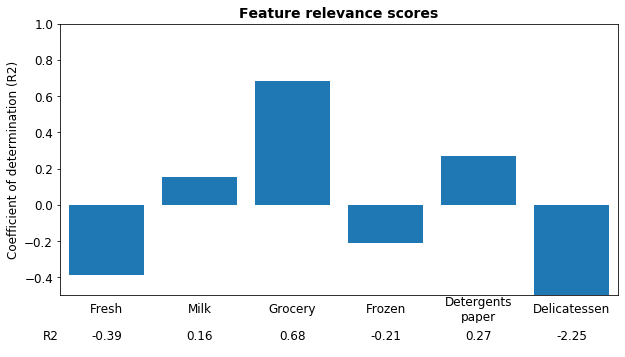

In [9]:
# define x and y values
names = list(scores.keys())
names[4] = 'Detergents\npaper'
values = list(scores.values())

# plot the scores
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(range(len(scores)), values)
ax.set_title('Feature relevance scores', fontweight='bold', fontsize=14)
ax.set_ylabel('Coefficient of determination (R2)', fontsize=12)
ax.tick_params(labelsize=12)
ax.set_ylim(-0.5, 1)
ax.set_xlim(-0.5, 5.5)
table = ax.table(cellText=[["{0:.2f}".format(v) for v in values]], colLabels=names, cellLoc='center', 
         rowLabels=['R2'], bbox=[0.0,-0.2,1,0.2])
ax.get_xaxis().set_visible(False)
table.set_fontsize(12)
for key, cell in table.get_celld().items():
    cell.set_linewidth(0);

To better define the answer, I calculated coeffients of determination for all features and plotted the results in the chart above.
As you can see from the chart: 
* **Milk** and **Detergents & paper** seem to be the most essential categories to consider when identifying customer's spending habits. Their coefficients of determination have the lowest positive values (0.16 and 0.27 correspondingly), which implies that these features cannot be predicted confidently by using other features. 
* On the other hand, **Grocery** seems to be a rather non-essential feature that can be predicted with relative confidence with other features (R<sup>2</sup> = 0.68).
* **Fresh**, **Frozen**, and **Delicatessen** all have negative R<sup>2</sup>, which means that the model failed to fit the data.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

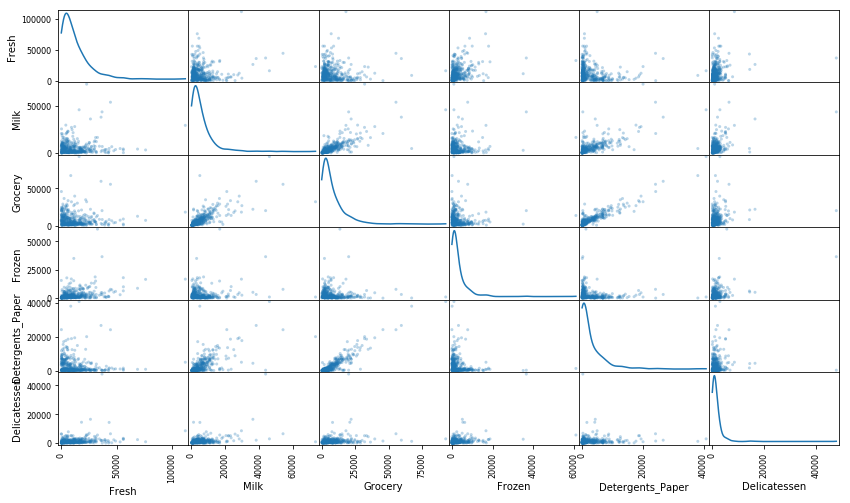

In [10]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**

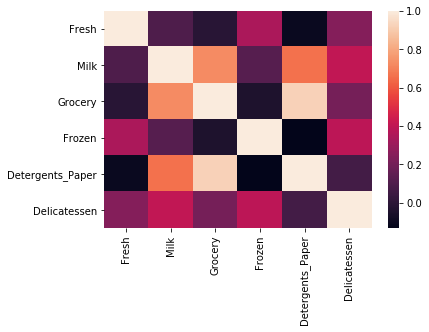

In [11]:
# plot the heatmap
sns.heatmap(data.corr());

* Looking at the scatter matrix above, all features seem to be positively-skewed. More specifically, they all have a major part of the data points concentrated very close to the zero, but also multiple outliers with unusually high values of total spend. 
* There are multiple pairs of features that seem to be correlated: mostly `Grocery` and `Detergents & Paper`, but also, to some degree, `Grocery` and `Milk`, and, even less so, `Milk` and `Detergents & Paper`.
* This seems to be in line with my previous observations, which identified `Grocery` as the least essential feature that can be predicted by using other features, while pinpointing `Milk` and `Detergents & Paper` as features that are necessary for identifying customer's spending behavior
* As I mentioned above, all of those features are positively-skewed, with high number of values concentrated around zero
* The heatmap confirms the same conclusions by identifying high levels of correlation between `Grocery` on one side and `Milk` and `Detergents & Paper` on the other side. `Milk` and `Detergents & Paper` also seem to be somewhat correlated with each other, but that relationship seems to be much weaker

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

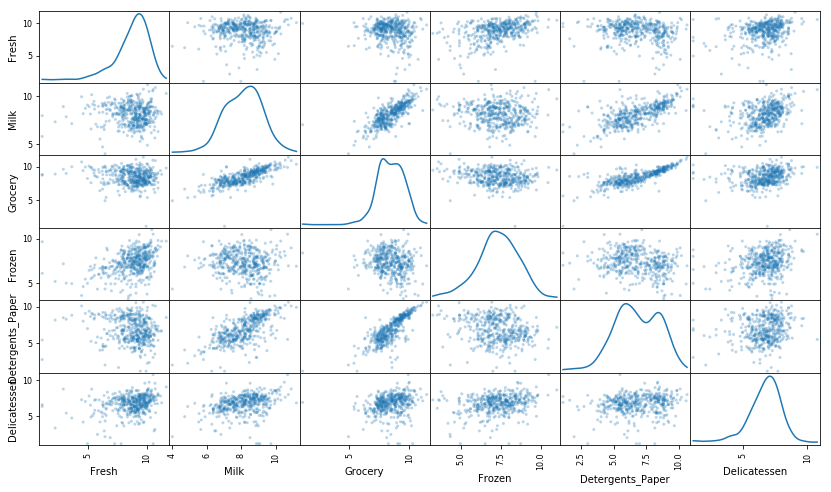

In [12]:
# TODO: Scale the data using the natural logarithm
log_data = data.copy().apply(np.log)

# TODO: Scale the sample data using the natural logarithm
log_samples = samples.copy().apply(np.log)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [13]:
# Display the log-transformed sample data
display(log_samples)

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0  9.492884  7.086738  8.347827  8.764678          6.228511      7.488853
1  9.566335  6.688355  8.021256  6.184149          4.605170      6.249975
2  7.759187  8.967632  9.382106  3.951244          8.341887      7.436617

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [14]:
# For each feature find the data points with extreme high or low values
Q1 = np.percentile(log_data, 25, axis=0)
Q3 = np.percentile(log_data, 75, axis=0)
IQR = Q3 - Q1
threshold_lower = Q1 - IQR * 1.5
threshold_upper = Q3 + IQR * 1.5

for i, feature in enumerate(log_data.keys()):
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= threshold_lower[i]) & \
                       (log_data[feature] <= threshold_upper[i]))])
    
# OPTIONAL: Select the indices for data points you wish to remove

outliers_all = log_data[(log_data <= threshold_lower).any(axis=1) | (log_data >= threshold_upper).any(axis=1)].index
outliers  = []

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361          8.271037      5.351858
338  1.098612   5.808142   8.856661  9.655090          2.708050      6.309918
353  4.762174   8.742574   9.961898  5.429346          9.069007      7.013016
355  5.247024   6.588926   7.606885  5.501258          5.214936      4.844187
357  3.610918   7.150701  10.011086  4.919981          8.816853      4.700480
412  4.574711   8.190077   9.425452  4.584967          7.996317      4.127134

Data points considered outliers for the feature 'Milk':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
86   10.039983  11.205013  10.377047  6.894670          9.906981      6.805723
98    6.220590   4.718499   6.656727  6.796824          4.025352      4.882802
154   6.432940   4.007333   4.919981  4.317488          1.945910      2.079442
356  10.029503   4.897840   5.384495  8.057377          2.197225      6.306275

Data points considered outliers for the feature 'Grocery':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
154  6.432940  4.007333  4.919981  4.317488          1.945910      2.079442

Data points considered outliers for the feature 'Frozen':


Fresh      Milk    Grocery     Frozen  Detergents_Paper  Delicatessen
38    8.431853  9.663261   9.723703   3.496508          8.847360      6.070738
57    8.597297  9.203618   9.257892   3.637586          8.932213      7.156177
65    4.442651  9.950323  10.732651   3.583519         10.095388      7.260523
145  10.000569  9.034080  10.457143   3.737670          9.440738      8.396155
175   7.759187  8.967632   9.382106   3.951244          8.341887      7.436617
264   6.978214  9.177714   9.645041   4.110874          8.696176      7.142827
325  10.395650  9.728181   9.519735  11.016479          7.148346      8.632128
420   8.402007  8.569026   9.490015   3.218876          8.827321      7.239215
429   9.060331  7.467371   8.183118   3.850148          4.430817      7.824446
439   7.932721  7.437206   7.828038   4.174387          6.167516      3.951244

Data points considered outliers for the feature 'Detergents_Paper':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
161  9.428190  6.291569  5.645447  6.995766          1.098612      7.711101

Data points considered outliers for the feature 'Delicatessen':


Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
66    2.197225   7.335634   8.911530   5.164786          8.151333   
109   7.248504   9.724899  10.274568   6.511745          6.728629   
128   4.941642   9.087834   8.248791   4.955827          6.967909   
137   8.034955   8.997147   9.021840   6.493754          6.580639   
142  10.519646   8.875147   9.018332   8.004700          2.995732   
154   6.432940   4.007333   4.919981   4.317488          1.945910   
183  10.514529  10.690808   9.911952  10.505999          5.476464   
184   5.789960   6.822197   8.457443   4.304065          5.811141   
187   7.798933   8.987447   9.192075   8.743372          8.148735   
203   6.368187   6.529419   7.703459   6.150603          6.860664   
233   6.871091   8.513988   8.106515   6.842683          6.013715   
285  10.602965   6.461468   8.188689   6.948897          6.077642   
289  10.663966   5.655992   6.154858   7.235619          3.465736   
343   7.431892   8.848509  10.177932   7.283448          9.646593   

     Delicatessen  
66       3.295837  
109      1.098612  
128      1.098612  
137      3.583519  
142      1.098612  
154      2.079442  
183     10.777768  
184      2.397895  
187      1.098612  
203      2.890372  
233      1.945910  
285      2.890372  
289      3.091042  
343      3.610918

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

In [15]:
# create a variable holding points that are outliers based on multiple features
outliers_multiple = log_data[(log_data <= threshold_lower).sum(axis=1) \
                             + (log_data >= threshold_upper).sum(axis=1) > 1]

In [16]:
# create a variable holding table cell colors (red for points below lower bound, green for points above upper one)
colors = [['w'] * outliers_multiple.shape[1]] * outliers_multiple.shape[0]
colors = np.asarray(colors, dtype=object)
colors[(outliers_multiple<=threshold_lower).values] = 'lightsalmon'
colors[(outliers_multiple>=threshold_upper).values] = 'yellowgreen'

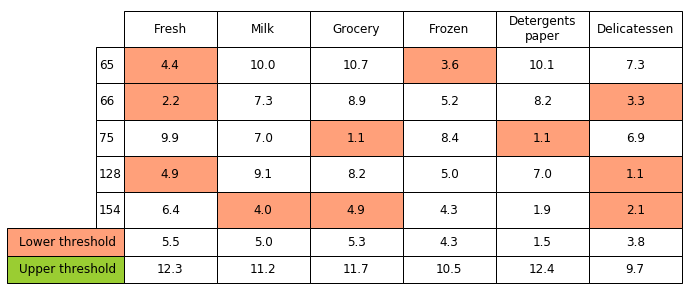

In [17]:
# print out a table of points that are outliers based on multiple features
## set number of decimal points to print out
np.set_printoptions(precision=2)
## create and hide the axis
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('off')
## create a table with outliers
values = ax.table(cellText=np.round(outliers_multiple.values, 1), cellLoc='center',
                 loc='center', bbox=(0, 0.2, 1, 0.8), rowLabels=outliers_multiple.index, colLabels=names,
                 cellColours=colors)
## create tables with lower and upper bounds of the outlier region
lower = ax.table(cellText=[np.round(threshold_lower, 1)], cellLoc='center', #cellColours=[['lightsalmon']*6],
                 loc='center', bbox=(0, 0.1, 1, 0.1), rowLabels=['Lower threshold'], rowColours=['lightsalmon'])
upper = ax.table(cellText=[np.round(threshold_upper, 1)], cellLoc='center', #cellColours=[['yellowgreen']*6],
                 loc='center', bbox=(0, 0, 1, 0.1), rowLabels=['Upper threshold'], rowColours=['yellowgreen'])
## increase fonts
for table in [values, lower, upper]:
    table.set_fontsize(12)

In [18]:
# calculate the share of outliers in the dataset
print('Total number of samples in the dataset: {}'.format(len(log_data)))
print('Total number of outliers in the dataset: {}'.format(len(outliers_all)))
print('All outliers represent {}% of the overall dataset'\
                  .format(round(len(outliers_all)/len(log_data)*100)))
print('Multi-dimension outliers only represent {}% of the overall dataset'\
                  .format(round(len(outliers_multiple)/len(log_data)*100)))

Total number of samples in the dataset: 440
Total number of outliers in the dataset: 42
All outliers represent 10% of the overall dataset
Multi-dimension outliers only represent 1% of the overall dataset


In [19]:
# redevine outliers variable to only account for multi-dimensional outliers 
outliers = list(set(outliers_multiple.index.tolist()) - set(samples.index))

In [20]:
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

* There are 42 outliers in this dataset. So, while many clustering algorithms like K-means are sensitive to outliers, in this specific case **removing them all would reduce the size of the dataset** by full 10%.
* However, even if we don't remove every single outlier, at least **removing those points that are outliers on multiple dimensions** is important. 
    * The reason these should be removed is because keeping them might significantly skew the results of our clustering. For example, K-means clustering algorithm would continuously define cluster centroids as the mean of all datapoints assigned to those clusters. So, every outlier would strongly pull its centroid in its own direction, away from the majority of the points in that cluster. Even worse, if a point is an outlier on multiple dimensions, it can introduce major noise to the data, and the algorithm might fail to converge to a state that makes any intuitive sense.
    * As the table above represents, there are 5 points that are outliers on multiple dimensions (~1% of the overall dataset). Keeping them would significantly skew the results of our clustering. For example, keeping point #65 would lead to its cluster centroid being significanly under-indexed on Fresh and Frozen vs. the majority of the points in that cluster.
    * Therefore, I will be removing those 5 points for the purpose of this analysis.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

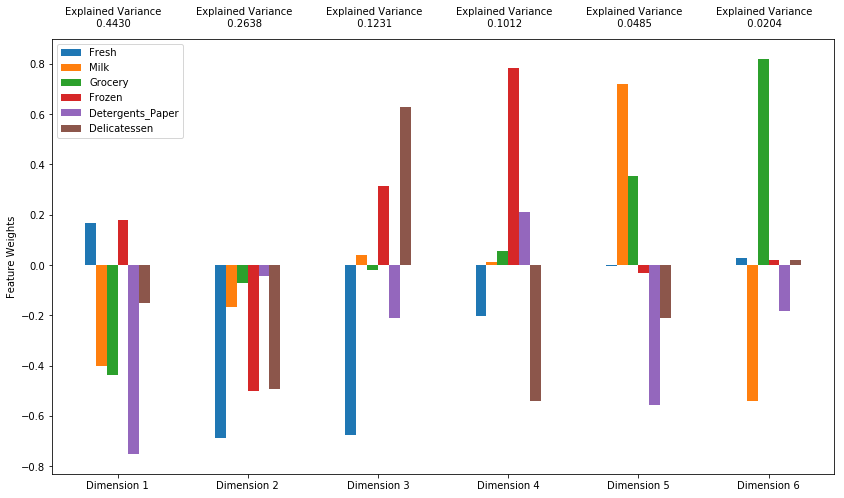

In [21]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=good_data.shape[1])
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained **in total** by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

In [22]:
print('The first and the second principal components explain approximately {:.0%} of the variance in the data' \
            .format(pca.explained_variance_ratio_[:2].sum()))

The first and the second principal components explain approximately 71% of the variance in the data


In [23]:
print('The first four principal components explain approximately {:.0%} of the variance in the data' \
            .format(pca.explained_variance_ratio_[:4].sum()))

The first four principal components explain approximately 93% of the variance in the data


In [24]:
def describe_dimension(id, threshold = 0.2):
    '''Returns description of the principal component based on its ID.'''
    
    major_features_id = (np.abs(pca.components_[id]) > threshold) 
    major_features = good_data.columns[major_features_id]
    
    return '**Dimension {}**: Explains *{:.1%}* of total variance; best represented features: {}' \
            .format(id + 1, pca.explained_variance_ratio_[id], str(major_features.tolist())[1:-1].replace('\'', '`'))

In [25]:
# print out all principal component descriptions
for i in range(6):
    display(Markdown(repr(describe_dimension(i))))

'**Dimension 1**: Explains *44.3%* of total variance; best represented features: `Milk`, `Grocery`, `Detergents_Paper`'

'**Dimension 2**: Explains *26.4%* of total variance; best represented features: `Fresh`, `Frozen`, `Delicatessen`'

'**Dimension 3**: Explains *12.3%* of total variance; best represented features: `Fresh`, `Frozen`, `Detergents_Paper`, `Delicatessen`'

'**Dimension 4**: Explains *10.1%* of total variance; best represented features: `Fresh`, `Frozen`, `Detergents_Paper`, `Delicatessen`'

'**Dimension 5**: Explains *4.9%* of total variance; best represented features: `Milk`, `Grocery`, `Detergents_Paper`, `Delicatessen`'

'**Dimension 6**: Explains *2.0%* of total variance; best represented features: `Milk`, `Grocery`'

In [26]:
# add up and sort total values for top 4 components
top4 = pca.components_[:4].sum(axis=0)
top4_id = np.argsort(top4)
# find most negatively and most positively represented features
most_negative = good_data.columns[top4_id[0]]
most_positive = good_data.columns[top4_id[-1]]

In [27]:
# print out most negatively and most positively represented features
display(Markdown('**Top 4 components:**'))

display(Markdown( \
    '- Most **positively** represented feature is `{}`, which means its growth will \
    drive the most growth in top 4 components' \
    .format(most_positive)))

display(Markdown( \
    '- Most **negatively** represented feature is `{}`, which means its growth will \
    drive the most decrease in top 4 components' \
    .format(most_negative)))

**Top 4 components:**

- Most **positively** represented feature is `Frozen`, which means its growth will     drive the most growth in top 4 components

- Most **negatively** represented feature is `Fresh`, which means its growth will     drive the most decrease in top 4 components

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [28]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0       1.1553      -1.4052       0.5422       0.4127      -0.6865   
1       2.4162       0.6069      -0.7652      -1.3209       0.1614   
2      -2.7813       1.7417      -0.2246      -2.4609       0.0291   

   Dimension 6  
0       0.6409  
1       0.8089  
2      -0.0623

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [29]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [30]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0       1.1553      -1.4052
1       2.4162       0.6069
2      -2.7813       1.7417

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

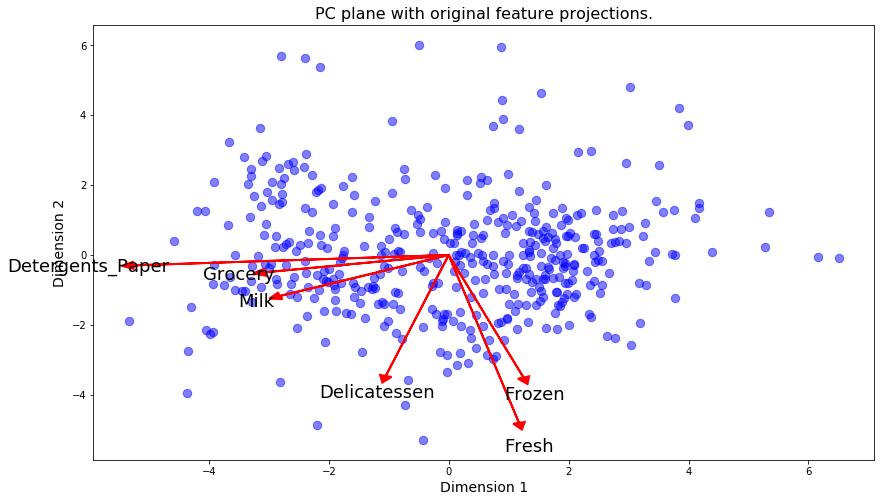

In [31]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

* **K-Means**:
    * *Pros*:
        * Simple to understand and interpret
        * Relatively lightweight and runs fast
        * Does well in high-dimensional data
    * *Cons*:
        * Usually skews towards circular or spherical clusters, doesn't perform well with more complex shapes
        * Hard clustering might lead to suboptimal results when points might belong to multiple clusters at the same time
* **Gaussian Mixture Model**:
    * *Pros*:
        * More flexible than K-Means
        * Can perform well with clusters of any shape
        * Soft clustering better captures reality in cases where boundaries between clusters are much less deterministic and/or binary
    * *Cons*:
        * Might be a little more difficult to interpret
        * Initializing clusters might be a little challenging in high-dimensional settings
        
Looking at the biplot chart above, **Gaussian Mixture Model** might be a better fit in this case, given that:
* Soft clustering will probably better capture the fact that outlets might choose from a very diverse set of business models, including different combinations of multiple models 
* Some clusters are potentially not purely circular / spherical in shape'

In general, GMM is a more flexible model that I hope will enable us to better leverage the underlying complexity of the data to our advantage.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [32]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

scores = {}

for i in range(2, 10):
    
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=i, random_state=42)
    clusterer.fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    
    scores[i] = score

### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

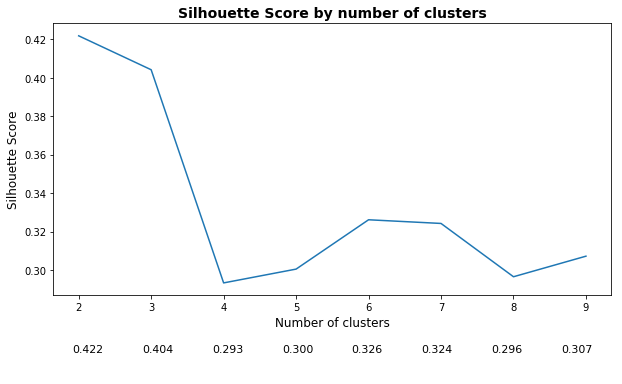

In [33]:
fig, ax = plt.subplots(figsize=(10, 5))
pd.Series(scores).plot(ax=ax)
ax.set_xlabel('Number of clusters', fontsize=12)
ax.set_ylabel('Silhouette Score', fontsize=12)
ax.set_title('Silhouette Score by number of clusters', fontsize=14, fontweight='bold')
table = ax.table(cellText=[['{:.3f}'.format(x) for x in scores.values()]], bbox=[0, -0.3, 1, 0.2], cellLoc='center')
for cell in table.get_celld().values():
    cell.set_linewidth(0)
table.set_fontsize(11);

* The silhouette scores for different cluster numbers range from 0.293 (4 clusters) to 0.422 (2 clusters)
* Given that 2 clusters option has the highest silhouette score, I will start by using this approach. However, if having 2 clusters ends up being too simplistic for practical reasons (i.e., it might not catch up on the customer specifics that I need to understand to answer the question), 3 clusters (0.404 score) would be the next option to consider

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

In [34]:
# fit the model for the selected number of clusters and predict sample mappings
clusterer = GaussianMixture(n_components=2, random_state=42)
clusterer.fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
sample_preds = clusterer.predict(pca_samples)

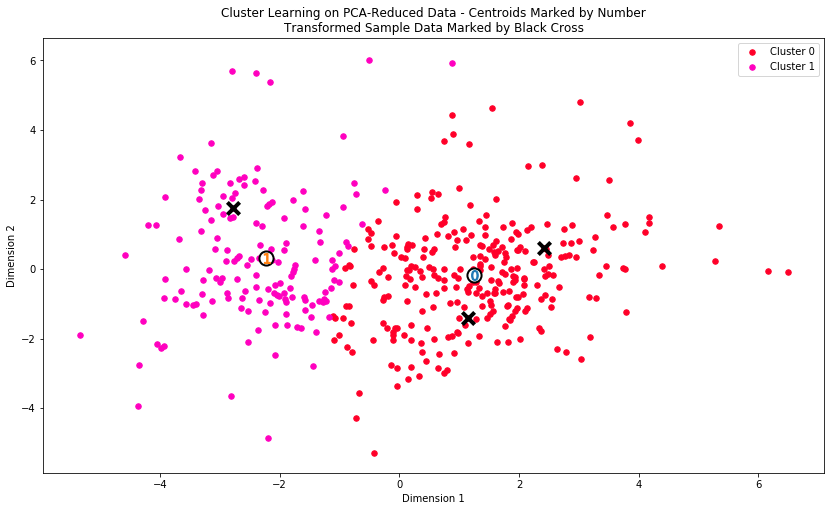

In [35]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [36]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  8953.0  2114.0   2765.0  2075.0             353.0         732.0
Segment 1  3552.0  7837.0  12219.0   870.0            4696.0         962.0

### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

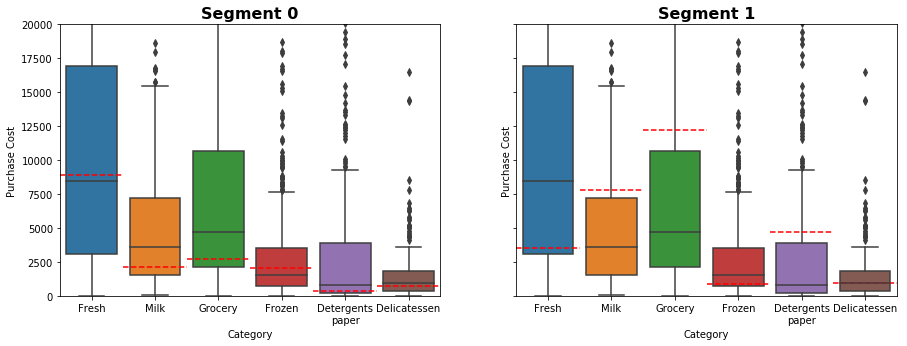

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
for i, segment in enumerate(true_centers.index):
    plot_sample(data_long, true_centers.loc[segment], segment, ax[i])

* **Segment 0** seems to be slightly above average in Fresh and Frozen, but at the lower end of spend in almost every other category. This profile reminds me of the Sample point 0 that I discussed at the beginning of this project. Same as Sample 0, my assumption for Segment 0 would be that it is *a salad bar or a health-conscious restaurant* (low on Milk, but high on Frozen and Fresh)
* **Segment 1**, on the other hand, and similar to our Sample point 2, is very low on Frozen and Fresh, but over-indexes on Milk, Grocery, and Detergent & paper. Same as we discussed with Sample 2, this looks similar to a *pharmacy-like store* that carries easy-to-store essentials, but avoids Fresh or Frozen items that are more short-lived / more costly to preserve

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [38]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer:**

As I mentioned in my answer to Question 8 above, this outcome completely aligns with the profiles that I originally envisioned for these sample points. The only slight variation is Sample point 1, which I originally classified as a street market booth-like outlet specializing in Fresh vegetables, but the model put it in the same cluster as point 0. This actually makes sense, as the only difference vs. point 0 was that point 1 was low on Frozen and Delicatessen. Apparently, this sub-segment is not as widely represented in the data to warrant a separate cluster of its own.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

Customer segmentation can be a great resource in solving this problem. As we saw above - first within our PCA analysis and then in the actual segmentation outcomes - intensity of Fresh and Frozen purchasing is a major differentiating factor across our customer base. Customers who over-index on Fresh and Frozen will probably suffer from this change, given the perishable nature of these products. Other customers, who don't carry much Fresh and Frozen, will probably be less affected by the change and, therefore, will be more open to it.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

The distributor can train a supervised classifier model (e.g., a decision tree or Random Forest) using our clusterer predictions (i.e., the segments that each point in the original data got assigned to) as labels. Having this classifier trained would then enable the distributor to predict the labels (i.e., segments) for the new data points (i.e., estimated product spending).

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

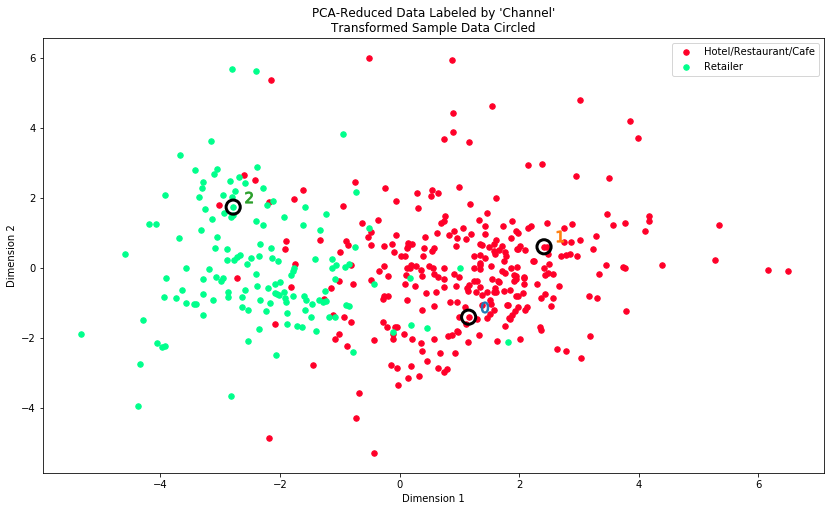

In [39]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

* This new information about the outlet channel aligns very well with the insights of our clustering exercise. Segmentation identified two main clusters split vertically around "-1" on Dimention 1, and this ends up being completely in line with the channel information we obtained.
* As one can see, while the channels are clearly separated, there is still considerable overlap between them, with some Retailers showing up in the Hotel/Restaurant/Cafe territory, and vice versa. Which probably assumes that some outlets follow "hybrid" business models and have characteristics of both segments
* Channel classification is very consistent with my definition of the customer segments. Hotel/Restaurant/Cafe channel aligns perfectly with Segment 0, which I identified as potentially "a salad bar or a health-conscious restaurant". Retailer channel aligns with Segment 1, which I hypothesized might be a pharmacy-like store that carries easy-to-store essentials